In [2]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as npa

In [3]:
input_image_path = ["uploads\\Screenshot 2023-09-21 101537.jpg"]

from keras_ocr.detection import Detector
from keras_ocr.recognition import Recognizer

import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

# Get a set of three example images
images = [
    keras_ocr.tools.read(url) for url in input_image_path
]

# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
prediction_groups = pipeline.recognize(images)

# Plot the predictions
# fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
# for image, predictions in zip( images, prediction_groups):
#     keras_ocr.tools.drawAnnotations(image=image, predictions=predictions)

Looking for C:\Users\Vaibhav\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\Vaibhav\.keras-ocr\crnn_kurapan.h5
1/1 [==============================] - 5s 5s/step


In [4]:
print(prediction_groups)
for i in range(len(prediction_groups[0])):
    print(prediction_groups[0][i][0])

[[('wwwesehat', array([[ 24.143234,  16.82521 ],
       [257.31097 ,  19.56836 ],
       [256.92432 ,  52.434402],
       [ 23.756577,  49.691254]], dtype=float32)), ('org', array([[263.31213 ,  25.069061],
       [325.0359  ,  28.31768 ],
       [323.37012 ,  59.96685 ],
       [261.64636 ,  56.71823 ]], dtype=float32))]]
wwwesehat
org


In [408]:
from scipy.signal import butter, filtfilt

def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [2]:
import easyocr
reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


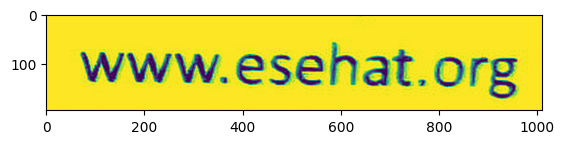

NameError: name 'reader' is not defined

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

input_image_path = [
    "uploads\\Screenshot 2023-09-21 101537.jpg",
    "uploads\\Screenshot 2023-09-21 111133.jpg",
    "uploads\\Screenshot 2023-09-21 111301.jpg",
]
for img in input_image_path:

    image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    grayscale_image = cv2.resize(image, (image.shape[1]*3, image.shape[0]*3), interpolation=cv2.INTER_LANCZOS4)
    
    kernel = np.array([[-1,-1,-1],
                       [-1, 9,-1],
                       [-1,-1,-1]])

    sharpened = cv2.filter2D(grayscale_image, -1, kernel)
    blurred_image = cv2.medianBlur(sharpened, 3)

    plt.imshow(sharpened)
    plt.show()
    text = reader.readtext(sharpened, detail=0)
    print(text)

In [368]:
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()
images = [
    keras_ocr.tools.read(url) for url in input_image_path
]

Looking for C:\Users\Vaibhav\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\Vaibhav\.keras-ocr\crnn_kurapan.h5


In [370]:
prediction_groups = pipeline.recognize(images)

print(prediction_groups)

1/1 [==============================] - 6s 6s/step
[[('wwwesehat', array([[ 24.143234,  16.82521 ],
       [257.31097 ,  19.56836 ],
       [256.92432 ,  52.434402],
       [ 23.756577,  49.691254]], dtype=float32)), ('org', array([[263.31213 ,  25.069061],
       [325.0359  ,  28.31768 ],
       [323.37012 ,  59.96685 ],
       [261.64636 ,  56.71823 ]], dtype=float32))], [('191', array([[16.,  3.],
       [72.,  3.],
       [72., 34.],
       [16., 34.]], dtype=float32)), ('90332', array([[ 77.,   3.],
       [171.,   3.],
       [171.,  35.],
       [ 77.,  35.]], dtype=float32)), ('14053', array([[172.,   3.],
       [262.,   3.],
       [262.,  34.],
       [172.,  34.]], dtype=float32))], [('contactapimakerdev', array([[ 18.81006  ,   9.438735 ],
       [293.88126  ,   6.7681456],
       [294.18173  ,  37.716686 ],
       [ 19.110535 ,  40.387276 ]], dtype=float32))]]


# Real Implimentation

In [4]:
import easyocr

reader = easyocr.Reader(['en'], gpu=False)

Using CPU. Note: This module is much faster with a GPU.


In [5]:
import cv2
from matplotlib import pyplot as plt
import time
import numpy as np


def process_cropped_images_easy_ocr(image, bboxes):
    final_text = []
    for i in bboxes[0][0]:
        cropped_part = image[i[2] : i[3], i[0] : i[1]]
        kernal = np.array([
             [-1,-1,-1],
             [-1,9,-1],
             [-1,-1,-1]
        ])
        final_image = cv2.filter2D(cropped_part, -1, kernal)
        text = reader.readtext(final_image, detail=0)
        if text:
                final_text.append(text[0])

    return " ".join(final_text)


def imageProcessing(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(image, (image.shape[1] // 3, image.shape[0] // 3))

    detect_text = reader.detect(resized_image)

    print(detect_text)
    return process_cropped_images_easy_ocr(resized_image, detect_text)


images = [
    "uploads\\20230923_222521.jpg",
    "uploads\\20230923_222555.jpg",
    "uploads\\20230923_222958.jpg",
    "uploads\\20230923_223019.jpg",
    "uploads\\20230923_223058.jpg",
    "uploads\\20230923_223127.jpg",
]

start = time.time()
text = imageProcessing(images[0])
print(text)
print(time.time()-start)

([[[47, 253, 247, 335], [727, 923, 257, 347], [49, 421, 361, 399], [527, 947, 367, 408], [47, 402, 389, 437], [681, 946, 401, 449], [43, 486, 570, 620], [576, 739, 586, 628], [48, 209, 608, 647], [223, 538, 611, 660], [47, 309, 645, 685], [48, 76, 682, 712], [77, 436, 678, 728]]], [[[[486.9820268028814, 580.1317018509494], [579.9067579585641, 592.1413718772387], [574.0179731971185, 625.8682981490506], [481.093242041436, 613.8586281227613]]]])
NPME NPM NPM MACHINERY PVT: LTD NPM PROCESS EQUIPMENTS WWWnpmmachinerycom WWWnpmpro.com Survey No. 252, Opp IOCL Petrol Changodar; Ahmedabad 382213, Gujarat (India) T:+91 95120 07086 E; sales@npmmachinery com
11.146462678909302


In [110]:
texts = [
    "JOHARIE medtech Johari Digital Healthcare Ltd: G-582-584,EPIP, Boranada, Jodhpur +91 95496 87333 342012 (Rajasthan) India info@joharidigital.com INDIA Manufacturing SERBIA Design USA Business Development WWW] joharidigital.con",
    "MAHENDRA BHATIYA +91 99045 10864 GAUTAM BHATIYA +91 9998665779 Dev Opus Pvt: Ltd DEV OPUS 202, Chase House; Off. CG Road, Branding & Communication Opp Induben Khakhrawala; Ahmedabad-380009, Gujarat: info@devcreation.com WW.devopus com",
    "NUTRALIKE HEALTH CARE Meera Patel Purchase Executive +91 6351 585 991 purchaser WWWnutralike.com Manufacturing Unit: Plot No. A/22-23, Swagat-3 Industrial Park, At. Kuha Indore-Ahmedabad Highway; Tal. Daskroi, Ahmedabad-382 433 (Gujarat) INDIA",
    "SHYAMSUNDER SAHANI Authorised Business PPartner Bada Business Pyt Ltd 87358 81199 70467 67406 An Initiative By Dr Vivek BBilndra ssbadabusiness@gmailcom 208, SNS Synergy; Near Valentine Cinema; Piplod; Surat, Grow Your Business Join Now Bada Business",
    "MAYUR ] PATEL 4918320789e82 contact@apimakerdev wwwapimakerdev Api Merep Ahmedabad, Gujarat India = 382480",
    "NPME NPM NPM MACHINERY PVT: LTD NPM PROCESS EQUIPMENTS WWWnpmmachinerycom WWWnpmpro.com Survey No. 252, Opp IOCL Petrol Changodar; Ahmedabad 382213, Gujarat (India) T:+91 95120 07086 E; sales@npmmachinery com",
    "SHYAMSUNDER SAHANI Authorised Business Partner Bada Bus ness Pvt Ltd 87358 81199 / 70467 67406 An Initiative By Dr Vivek Bindra ssbadabusiness@gmail.com 208, SNS Synergy; Near Valentine Cinema; Piplod; Surat Grow Your Business Join Now Bada Business",
    "MAYUR Ja +91 83207 89882 contact@apimakerdev wwWapimakerdev Api Melop Ahmedabad; Gujarat India 382480",
    "JOHARI meoech Johari Digital Healthcare Ltd G-582-584, EPIP, Boranada, Jodhpur -9125496 87333 342012 (Rajasthan) India :info@joharidigital.com INDIA Manufacturing SERBIA Design & Engineering USA Business Development wwwjoharidigitalcom",
    "MAHENDRA BHATIYA +91 99045 10864 GAUTAM BHATIYA +91 99986 65779 Dev Pvt Ltd: DEV OPUS 202, Chase House; Off: CG Road, Bronding & Communication Induben Khakhrawala, Ahmedabad-380009, Gujarat: info@devcreation.com wwwdevopuscom",
    "NUTRALIKE HEALTH CAR E Meera Patel Purchase Executive +91 6351 585 991 purchase@nutralike.com WWW.nutralike.com Manufacturing Unit: Plot No: A/22-23, Swagat-3 Industrial Park, At: Kuha Village, Indore-Ahmedabad Highway, Tal. Daskroi, Ahmedabad-382 433 (Gujarat) INDIA",
    "iView iView Labs Pvt. Ltd. Software Innovation IT Consulting Product Development VNiviewlabs.com info@iviewlabs com +91 .98250 84654 Adit Medical Centre; Navrangpura, Ahmedabad, Gujarat 380009,INDIA"
]

In [112]:
import re
import spacy

nlp = spacy.load("en_core_web_sm")

CONTACT_REGEX = r'(?:\+|)\d(?:[\.\s-]?\d){9,11}'
URL_REGEX = r"www.*(?:in|com|org|net|dev)"
EMAIL_REGEX = r'[\d|\w]+@\w+.(?:com|in|net|org|dev)'

doc = nlp(texts[0])
organizations = [ent.text for ent in doc.ents if ent.label_ == 'ORG']

contacts = re.findall(CONTACT_REGEX, texts[0])
urls = re.findall(URL_REGEX, texts[0], re.IGNORECASE)
emails = re.findall(EMAIL_REGEX, texts[0], re.IGNORECASE)

print(texts[0])
print("|".join(organizations))
print(contacts)
print(urls)
print(emails)

JOHARIE medtech Johari Digital Healthcare Ltd: G-582-584,EPIP, Boranada, Jodhpur +91 95496 87333 342012 (Rajasthan) India info@joharidigital.com INDIA Manufacturing SERBIA Design USA Business Development WWW] joharidigital.con
Digital Healthcare Ltd
['+91 95496 87333']
[]
['info@joharidigital.com']
